In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
# Load the dataset
df = pd.read_csv('StudentsPerformance.csv') 

print("Dataset Shape:", df.shape)
print("\nSample Rows:")
print(df.head())

# Checking for missing values
print("\nMissing Values:")
print(df.isnull().sum())

# Descriptive statistics
print("\nDescriptive Stats:")
print(df.describe())

Dataset Shape: (1000, 8)

Sample Rows:
   gender race/ethnicity parental level of education         lunch  \
0  female        group B           bachelor's degree      standard   
1  female        group C                some college      standard   
2  female        group B             master's degree      standard   
3    male        group A          associate's degree  free/reduced   
4    male        group C                some college      standard   

  test preparation course  math score  reading score  writing score  
0                    none          72             72             74  
1               completed          69             90             88  
2                    none          90             95             93  
3                    none          47             57             44  
4                    none          76             78             75  

Missing Values:
gender                         0
race/ethnicity                 0
parental level of education    0
lunc

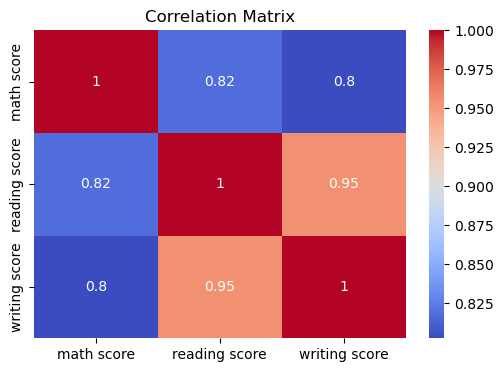

In [3]:
# Correlation heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(df[['math score', 'reading score', 'writing score']].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

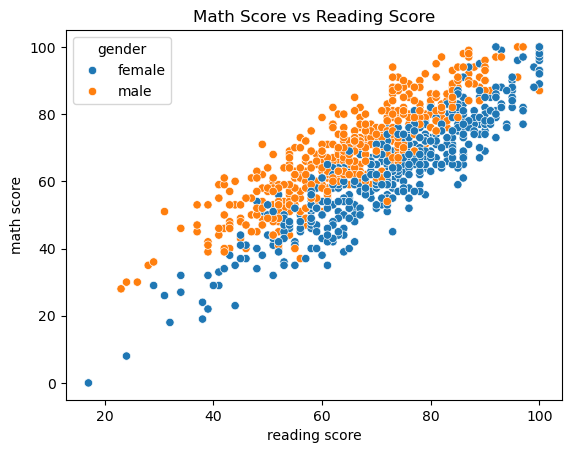

In [4]:
# Scatter plot for math vs reading
sns.scatterplot(data=df, x='reading score', y='math score', hue='gender')
plt.title('Math Score vs Reading Score')
plt.show()

In [31]:
# Features and Target selectio for Multiple Linear Regression
X = df[['reading score']]  
y = df['math score']


In [32]:
# 6. Split into train/test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=312)

# 7. Train multiple linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# 8. Predict and evaluate
y_pred = model.predict(X_test)

In [36]:

# Evaluation
print(f"\nModel Coefficient (slope): {model.coef_[0]:.2f}")
print(f"Intercept: {model.intercept_:.2f}")
print(f"R² Score: {r2_score(y_test, y_pred):.2f}")
print(f"MSE: {mean_squared_error(y_test, y_pred):.2f}")


Model Coefficient (slope): 0.83
Intercept: 8.82
R² Score: 0.73
MSE: 72.74


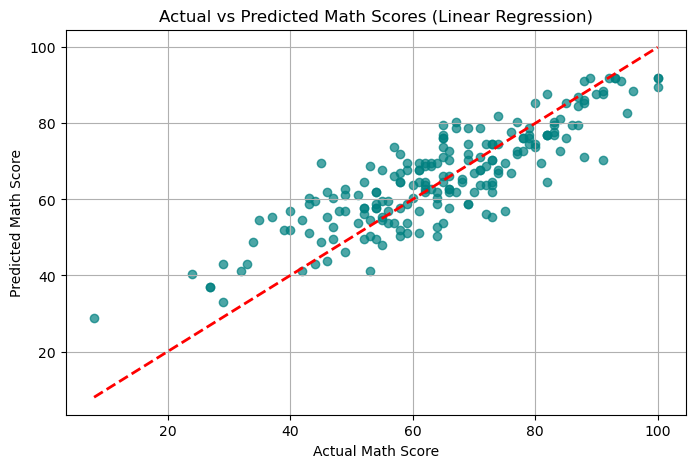

In [35]:
# Visualization: Predicted vs Actual
plt.figure(figsize=(8, 5))
plt.scatter(y_test, y_pred, color='teal', alpha=0.7)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--', linewidth=2)
plt.xlabel("Actual Math Score")
plt.ylabel("Predicted Math Score")
plt.title("Actual vs Predicted Math Scores (Linear Regression)")
plt.grid(True)
plt.show()